In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
MAXROW = 20
MAXCOL = 30

In [3]:
def processline(linelist):
    newlist = [(int(l.split(",")[0]),int(l.split(",")[1])) for l in linelist[1:]]
    return newlist
    
def read_data(filename):
    file = open(filename,'r')
    data = file.readlines()
    lists = []
    for line in data:
        new_list = processline(line.split(":"))
        lists.append(new_list)
    foodlist = lists [0]
    waterlist = lists [1]
    bedlist = lists [2]
    boxlist = lists [3]
    return foodlist, waterlist, bedlist, boxlist

def move_em(current, moves):
    nextgrid = np.zeros(current.shape, dtype="int16")
    
    for row in range(MAXROW):
        for col in range(MAXCOL):
            for g in range(current[row,col]):
                nextrow = row + random.choice(moves)
                nextcol = col + random.choice(moves)
                #print("Newpos = ", nextrow, nextcol)
                if nextrow < 0:
                    nextrow = 0
                if nextcol < 0:
                    nextcol = 0
                if nextrow >= MAXROW:
                    nextrow = MAXROW - 1
                if nextcol >= MAXCOL:
                    nextcol = MAXCOL - 1
                nextgrid[nextrow, nextcol] += 1
    return nextgrid

def rule1(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    pop[row, col] -= 1
                    marksList.append(-5)
                    print("OUT")
                    
def rule2(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    pop[row, col] += 1
                    marksList.append(5)
                    print("BOOST")
            

def make_feature_scatter(itemlist, colour):
    xlist = []
    ylist = []
    for r,c in itemlist:
        ylist.append(MAXROW - r - 1)  
        xlist.append(c) 
    plt.scatter(xlist,ylist,color=colour, marker='^')
    
def make_my_scatter(pop, colour):
    xlist = []
    ylist = []
    slist = []
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if pop[row,col] > 0:
                ylist.append(MAXROW - row - 1)  
                xlist.append(col) #flip rows/columns to y/x
                slist.append(pop[row,col]*20)
    plt.scatter(xlist,ylist,s=slist,color=colour, marker='*')

In [4]:
def main():
    marksListX = []
    marksListY = []
    
    goodarray = np.zeros((MAXROW,MAXCOL), dtype="int16")
    evilarray = np.zeros((MAXROW,MAXCOL), dtype="int16")

    food, water, bed, boxes = read_data("cat.txt") 
    
    g_moves  = [-1,0,1]
    e_moves  = [-1,0,1]
    
    # Starting population
    initpop = 10
    
    for i in range(1):
        goodarray[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
        evilarray[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 

    # Simulation
    for t in range(30):
        try:
            goodnext = move_em(goodarray, g_moves)
            evilnext = move_em(evilarray, e_moves)

            rule1(goodnext, bed, marksListX)
            rule1(evilnext, bed, marksListY)
            rule2(goodnext, water, marksListX)
            rule2(evilnext, water, marksListY)

            goodarray = goodnext
            evilarray = evilnext

            make_my_scatter(goodarray, "b")
            make_my_scatter(evilarray, "r")
            make_feature_scatter(water, "c")
            make_feature_scatter(bed, "y")
            
            plt.title("Cat Simulation (time = " + str(t) + ")")
            plt.xlabel("Columns")
            plt.ylabel("Rows")
            plt.xlim(-1,MAXCOL)
            plt.ylim(-1,MAXROW)
            plt.pause(1)
            plt.clf()
            
            print("X Team Score {}".format(sum(marksListX)))
            print("Y Team Score {}".format(sum(marksListY)))
        except:
              print("An exception occurred")
                
    if(sum(marksListX)>sum(marksListY)):
        print("X TEAM GAME WON")
    elif(sum(marksListX)==sum(marksListY)):
        print("==========")
    else:
        print("Y TEAM GAME WON")

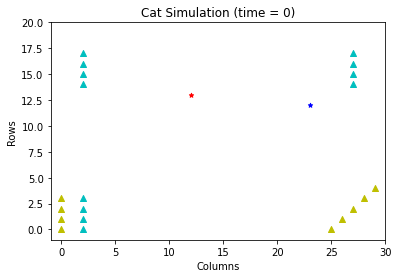

X Team Score 0
Y Team Score 0


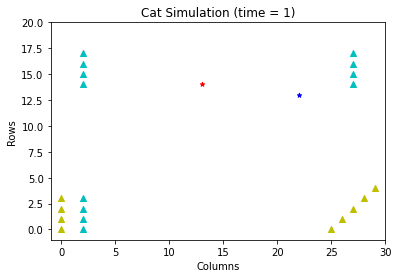

X Team Score 0
Y Team Score 0


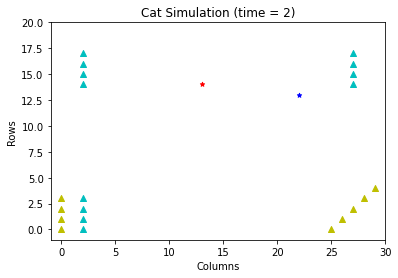

X Team Score 0
Y Team Score 0


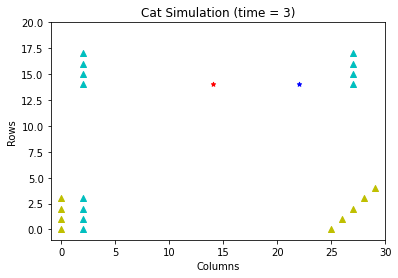

X Team Score 0
Y Team Score 0


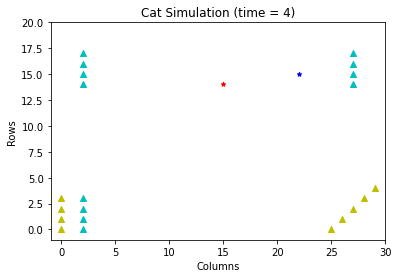

X Team Score 0
Y Team Score 0


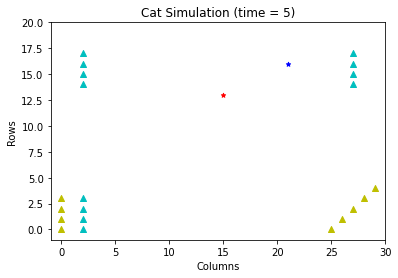

X Team Score 0
Y Team Score 0


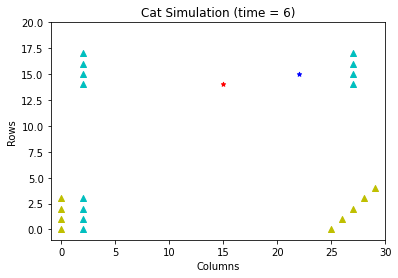

X Team Score 0
Y Team Score 0


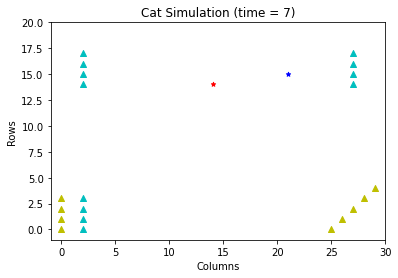

X Team Score 0
Y Team Score 0


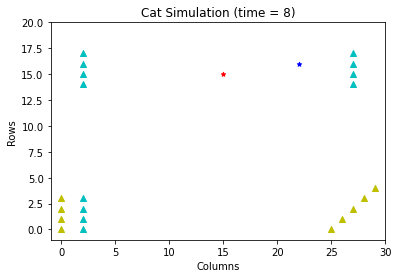

X Team Score 0
Y Team Score 0


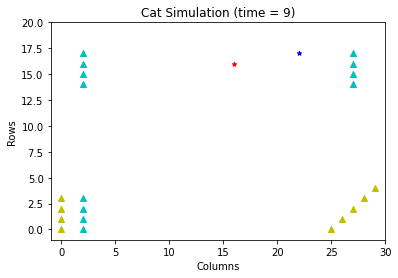

X Team Score 0
Y Team Score 0


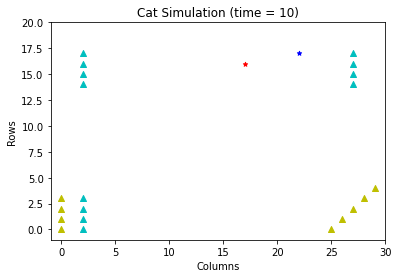

X Team Score 0
Y Team Score 0


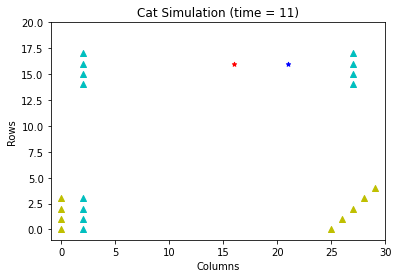

X Team Score 0
Y Team Score 0


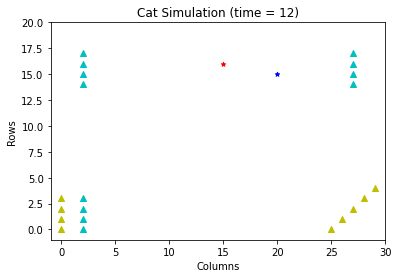

X Team Score 0
Y Team Score 0


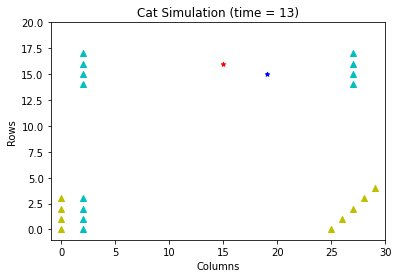

X Team Score 0
Y Team Score 0


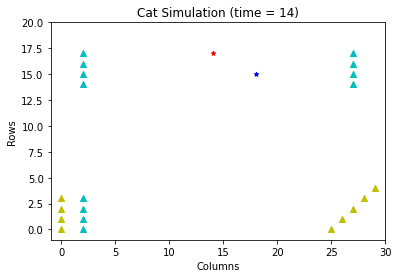

X Team Score 0
Y Team Score 0


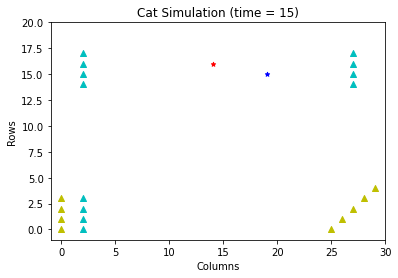

X Team Score 0
Y Team Score 0


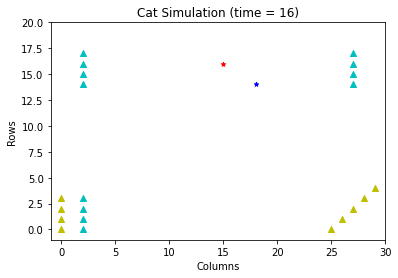

X Team Score 0
Y Team Score 0


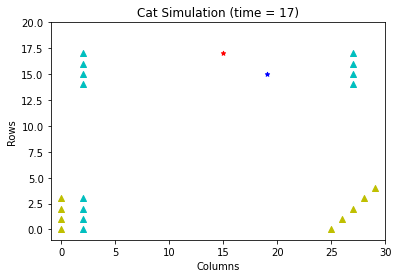

X Team Score 0
Y Team Score 0


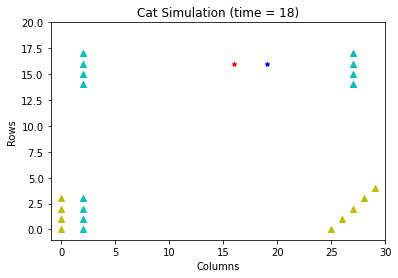

X Team Score 0
Y Team Score 0


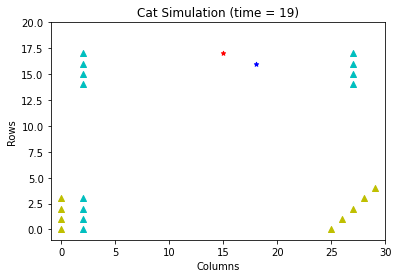

X Team Score 0
Y Team Score 0


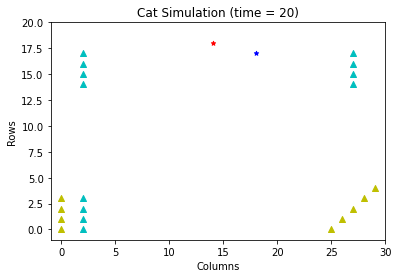

X Team Score 0
Y Team Score 0


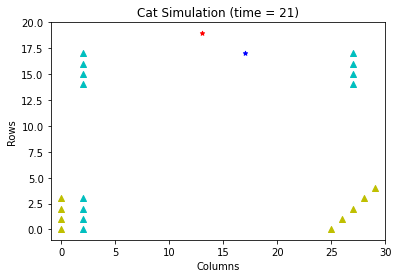

X Team Score 0
Y Team Score 0


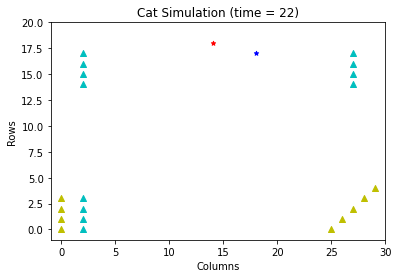

X Team Score 0
Y Team Score 0


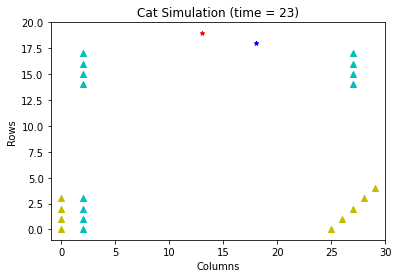

X Team Score 0
Y Team Score 0


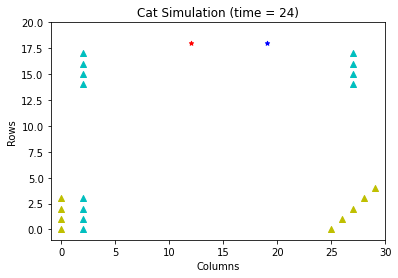

X Team Score 0
Y Team Score 0


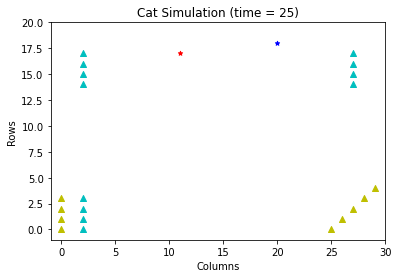

X Team Score 0
Y Team Score 0


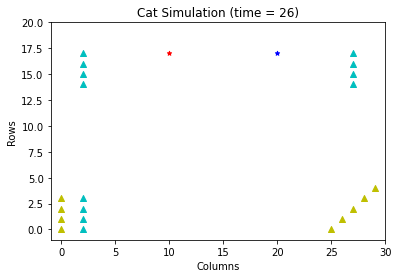

X Team Score 0
Y Team Score 0


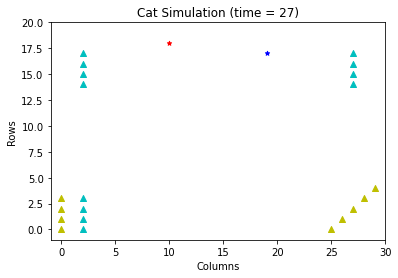

X Team Score 0
Y Team Score 0


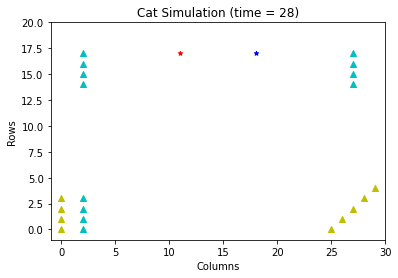

X Team Score 0
Y Team Score 0


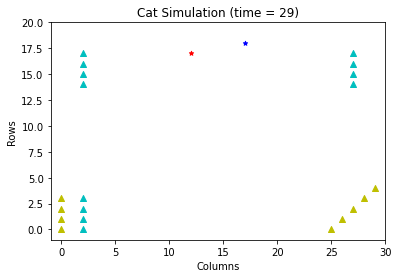

X Team Score 0
Y Team Score 0


<Figure size 432x288 with 0 Axes>

In [5]:
if __name__ == "__main__":
    main()